As the climate changes, predicting the weather becomes ever more important for businesses. You have been asked to support on a machine learning project with the aim of building a pipeline to predict the climate in London, England. Specifically, the model should predict mean temperature in degrees Celsius (°C).

Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `mlflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - **target** mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [1]:
!pip install mlflow

In [2]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [3]:
weather = pd.read_csv('london_weather.csv')

In [4]:
weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [5]:
weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [6]:
weather.tail()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
15340,20201231,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


In [7]:
weather.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [8]:
weather.dtypes

date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

In [9]:
weather.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [10]:
weather.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [12]:
weather['date'] = pd.to_datetime(weather['date'],format= '%Y%m%d')
weather.set_index('date',inplace = True)

In [13]:
weather

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [14]:
weather['month'] = weather.index.month

In [15]:
weather['year'] = weather.index.year

In [16]:
weather

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,month,year
date,,,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1,1979
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1,1979
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1,1979
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1,1979
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1,1979
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,12,2020
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,12,2020
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,12,2020


In [17]:
# Aggregate and calculate average metrics
weather_metrics = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']
weather_per_month = weather.groupby(['year', 'month'], as_index = False)[weather_metrics].mean()

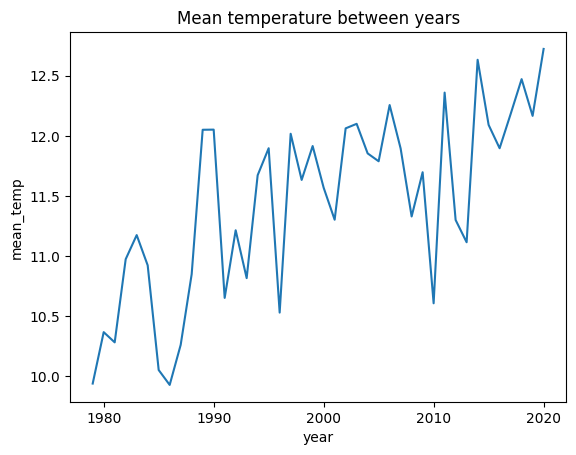

In [18]:
# Visualize relationships in the data
sns.lineplot(x="year", y="mean_temp", data=weather_per_month, errorbar=None)
plt.title("Mean temperature between years")
plt.show()

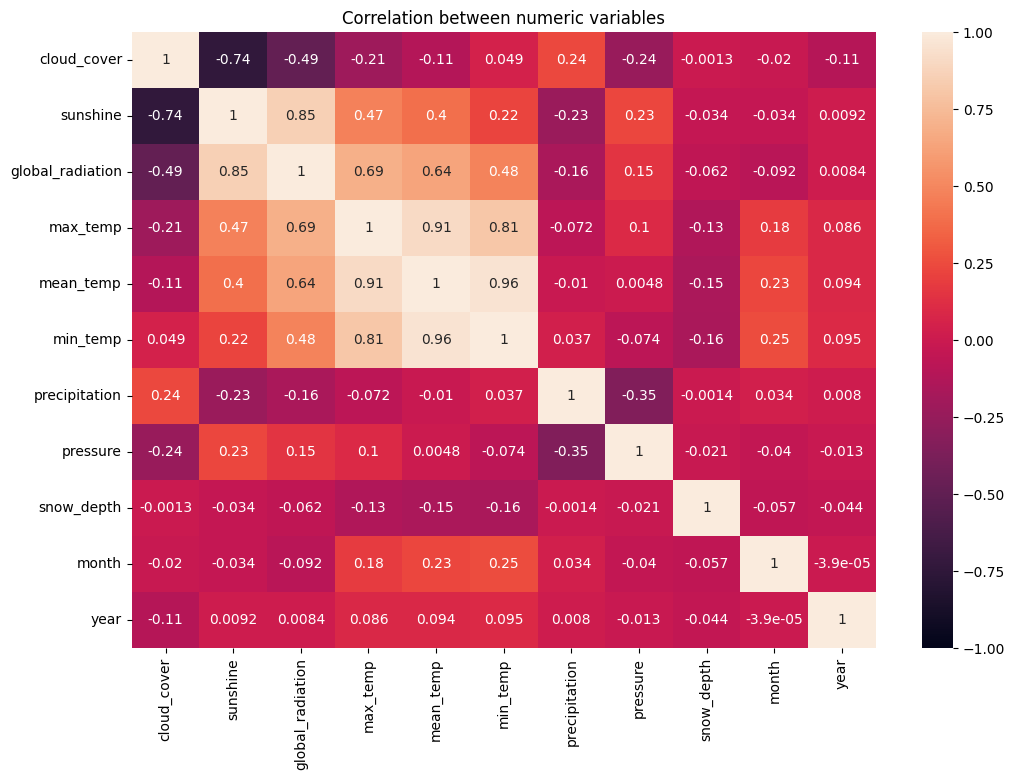

In [19]:
# Corrected the figure size parameters
plt.figure(figsize=(12, 8))
sns.heatmap(weather.corr(), annot=True, vmax=1, vmin=-1)
plt.title('Correlation between numeric variables')
plt.show()

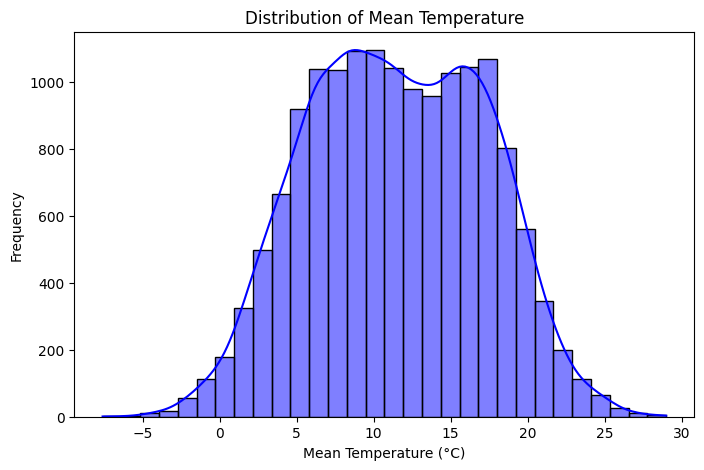

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(weather['mean_temp'], kde=True, bins=30, color='blue')
plt.title('Distribution of Mean Temperature')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

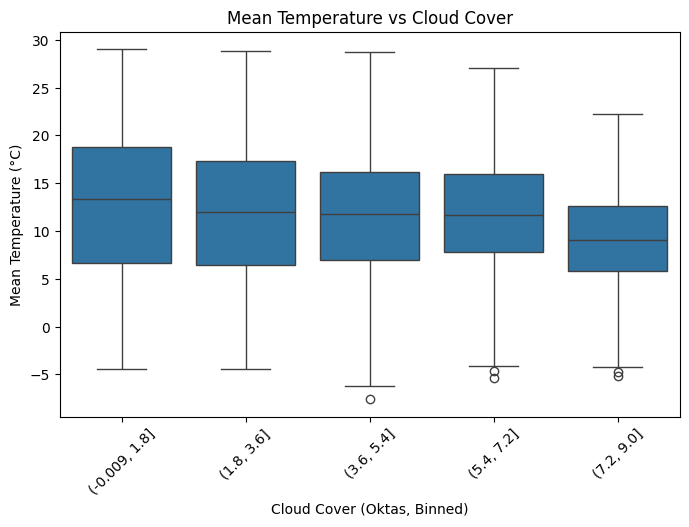

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(weather['cloud_cover'], bins=5), y='mean_temp', data=weather)
plt.title('Mean Temperature vs Cloud Cover')
plt.xlabel('Cloud Cover (Oktas, Binned)')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

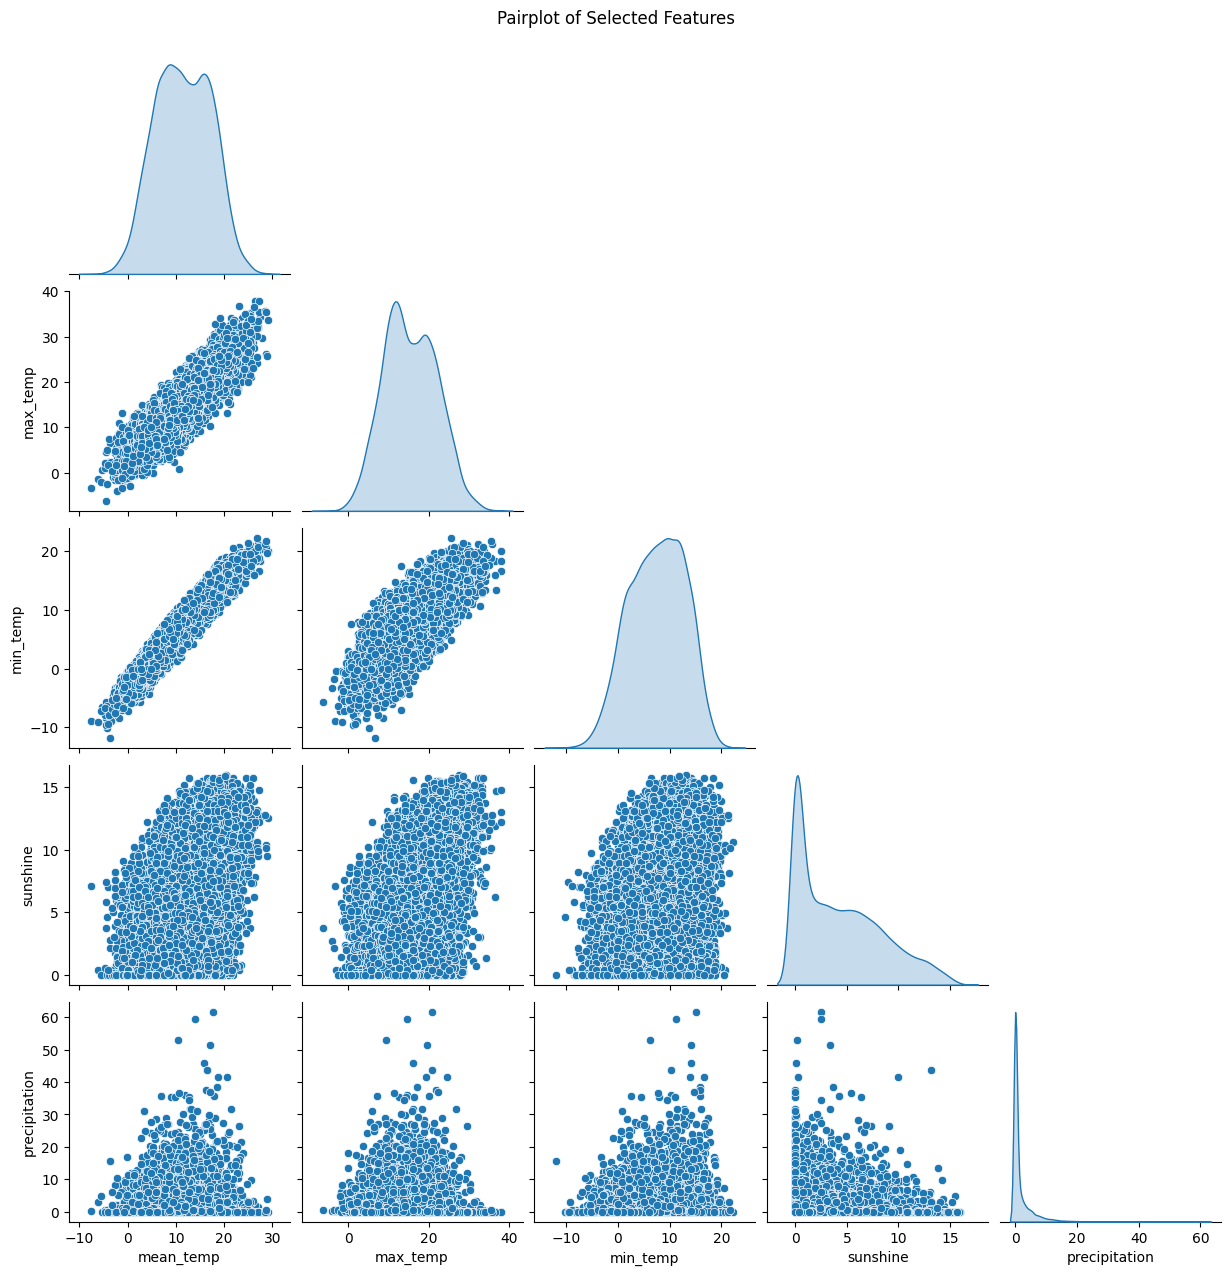

In [22]:
selected_features = ['mean_temp', 'max_temp', 'min_temp', 'sunshine', 'precipitation']
sns.pairplot(weather[selected_features], diag_kind="kde", corner=True)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

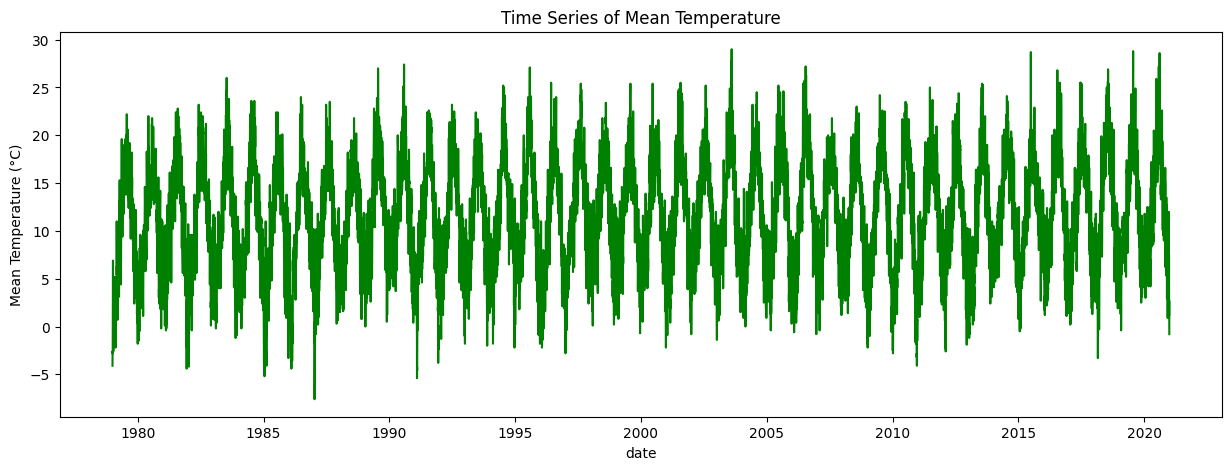

In [23]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='date', y='mean_temp', data=weather, color='green')
plt.title('Time Series of Mean Temperature')
plt.xlabel('date')
plt.ylabel('Mean Temperature (°C)')
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_2348\520675774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.cut(weather['precipitation'], bins=5), y='mean_temp', data=weather, palette="viridis")


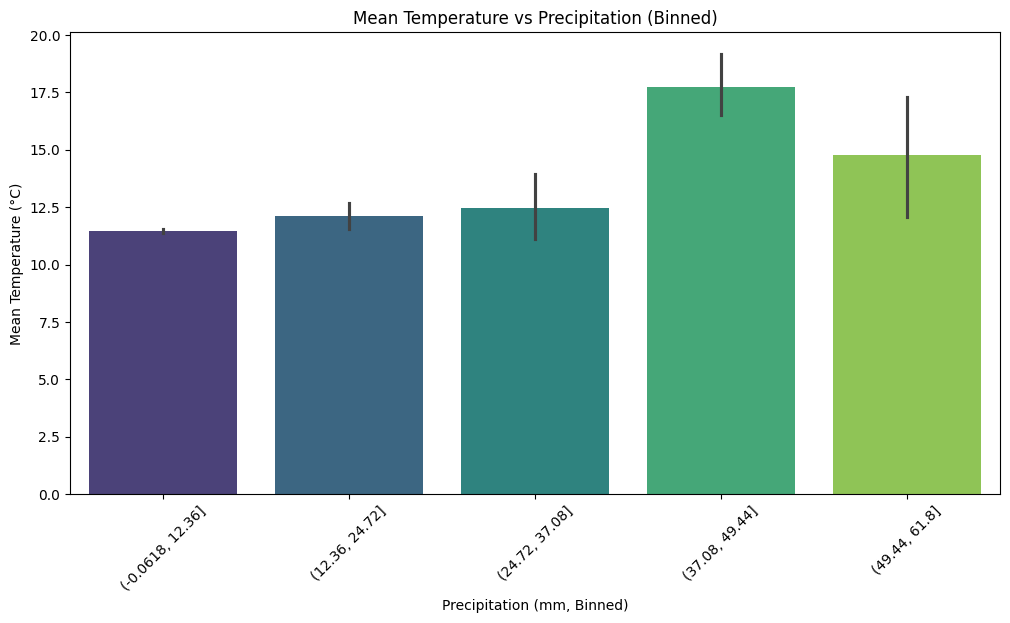

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=pd.cut(weather['precipitation'], bins=5), y='mean_temp', data=weather, palette="viridis")
plt.title('Mean Temperature vs Precipitation (Binned)')
plt.xlabel('Precipitation (mm, Binned)')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Choose features, define the target, and drop null values
feature_selection = ['month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', 'global_radiation']
target_var = 'mean_temp'
weather = weather.dropna(subset=['mean_temp'])

In [26]:
# Subset feature and target sets
X = weather[feature_selection]    
y = weather[target_var]

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Impute missing values

In [28]:
imputer = SimpleImputer(strategy="mean")
# Fit on the training data
X_train = imputer.fit_transform(X_train)
# Transform on the test data
X_test  = imputer.transform(X_test)

In [29]:
# Scale the data
scaler = StandardScaler()
# Fit on the training data
X_train = scaler.fit_transform(X_train)
# Transform on the test data
X_test = scaler.transform(X_test)  

In [30]:
# Predict, evaluate, and log the parameters and metrics of your models
for idx, depth in enumerate([1, 2, 5, 10, 20]): 
    run_name = f"run_{idx}"
    with mlflow.start_run(run_name=run_name):
        # Create models
        lin_reg = LinearRegression().fit(X_train, y_train)
        tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        
        # Create input example
        input_example = X_train[np.random.choice(X_train.shape[0], 10, replace=False)]
        
        # Log Linear Regression model
        lin_reg_signature = mlflow.models.infer_signature(X_train, lin_reg.predict(X_train))
        mlflow.sklearn.log_model(lin_reg, "lin_reg", input_example=input_example, signature=lin_reg_signature)
        
        # Log Decision Tree Regressor model
        tree_reg_signature = mlflow.models.infer_signature(X_train, tree_reg.predict(X_train))
        mlflow.sklearn.log_model(tree_reg, "tree_reg", input_example=input_example, signature=tree_reg_signature)
        
        # Log Random Forest Regressor model
        forest_reg_signature = mlflow.models.infer_signature(X_train, forest_reg.predict(X_train))
        mlflow.sklearn.log_model(forest_reg, "forest_reg", input_example=input_example, signature=forest_reg_signature)
        
        # Evaluate performance
        y_pred_lin_reg = lin_reg.predict(X_test)
        lin_reg_rmse = root_mean_squared_error(y_test, y_pred_lin_reg)
        
        y_pred_tree_reg = tree_reg.predict(X_test)
        tree_reg_rmse = root_mean_squared_error(y_test, y_pred_tree_reg)
        
        y_pred_forest_reg = forest_reg.predict(X_test)
        forest_reg_rmse = root_mean_squared_error(y_test, y_pred_forest_reg)
        
        # Log performance
        mlflow.log_param("max_depth", depth)
        mlflow.log_metric("rmse_lr", lin_reg_rmse)
        mlflow.log_metric("rmse_tr", tree_reg_rmse)
        mlflow.log_metric("rmse_fr", forest_reg_rmse)

2024/12/01 13:11:02 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    [
      0.427843996213949,
      0.353744924042943,
      -0.9589708483219153,
      0.6110167928467006,
      0.37120838512006893,
      -0.3218934421520396
    ],
    [
      -1.3068781616262384,
      0.8377920414382448,
      -0.808991635863522,
      -0.4228980562514439,
      -0.7300204086702365,
      -0.9417894966413402
    ],
    [
      1.2952050751340427,
      -2.066490662933566,
      0.6408074179009466,
      -0.4494086934078066,
      0.40918179180249326,
      -0.6712894001369181
    ],
    [
      0.13872363657391773,
      0.353744924042943,
      -0.3590539984883421,
      0.23986787265762313,
      -1.1477278821769041,
      0.5121485220699286
    ],
    [
      -1.5959985212662695,
      1.3218391588335467,
      -1.0839535253705763,
      -0.4494086934078066,
      1.4059837172161318,
      -1.1559354063740077
    ],
    [
      -0.15039672306611349,
     

In [31]:
# Search the runs for the experiment's results
experiment_results = mlflow.search_runs()
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse_fr,metrics.rmse_tr,metrics.rmse_lr,params.max_depth,tags.mlflow.log-model.history,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.user
0,ef9056f3ef02458999ddaddc2a924533,0,FINISHED,file:///C:/Users/shrey/mlruns/0/ef9056f3ef0245...,2024-12-01 07:41:24.747000+00:00,2024-12-01 07:41:33.516000+00:00,2.893355,3.807963,3.866773,20,"[{""run_id"": ""ef9056f3ef02458999ddaddc2a924533""...",run_4,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
1,6bee6459af7944219bdb018e263195e9,0,FINISHED,file:///C:/Users/shrey/mlruns/0/6bee6459af7944...,2024-12-01 07:41:18.217000+00:00,2024-12-01 07:41:24.747000+00:00,2.814782,3.068346,3.866773,10,"[{""run_id"": ""6bee6459af7944219bdb018e263195e9""...",run_3,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
2,3b850b80f74b45d8be5b8b9feef02148,0,FINISHED,file:///C:/Users/shrey/mlruns/0/3b850b80f74b45...,2024-12-01 07:41:12.477000+00:00,2024-12-01 07:41:18.209000+00:00,2.967462,3.027733,3.866773,5,"[{""run_id"": ""3b850b80f74b45d8be5b8b9feef02148""...",run_2,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
3,88944466502d4481892ac5a075455cfe,0,FINISHED,file:///C:/Users/shrey/mlruns/0/88944466502d44...,2024-12-01 07:41:06.578000+00:00,2024-12-01 07:41:12.468000+00:00,3.832143,3.917318,3.866773,2,"[{""run_id"": ""88944466502d4481892ac5a075455cfe""...",run_1,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
4,eea35f94dccd454682117d3efdd2e486,0,FINISHED,file:///C:/Users/shrey/mlruns/0/eea35f94dccd45...,2024-12-01 07:40:59.077000+00:00,2024-12-01 07:41:06.570000+00:00,4.694655,4.752035,3.866773,1,"[{""run_id"": ""eea35f94dccd454682117d3efdd2e486""...",run_0,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
5,aa6694f8ba314bd3805094c86b6b9ac3,0,FINISHED,file:///C:/Users/shrey/mlruns/0/aa6694f8ba314b...,2024-12-01 07:38:56.487000+00:00,2024-12-01 07:39:04.589000+00:00,2.884817,3.847029,3.669589,20,"[{""run_id"": ""aa6694f8ba314bd3805094c86b6b9ac3""...",run_4,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
6,9e66197c67a146898465b563afed0dfa,0,FINISHED,file:///C:/Users/shrey/mlruns/0/9e66197c67a146...,2024-12-01 07:38:50.031000+00:00,2024-12-01 07:38:56.479000+00:00,2.794742,3.052204,3.669589,10,"[{""run_id"": ""9e66197c67a146898465b563afed0dfa""...",run_3,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
7,9e0fbdcebbd242608a8ae2a63f710f77,0,FINISHED,file:///C:/Users/shrey/mlruns/0/9e0fbdcebbd242...,2024-12-01 07:38:44.392000+00:00,2024-12-01 07:38:50.031000+00:00,2.910917,2.976267,3.669589,5,"[{""run_id"": ""9e0fbdcebbd242608a8ae2a63f710f77""...",run_2,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
8,ca093fd5301b44889b70909457d1ba28,0,FINISHED,file:///C:/Users/shrey/mlruns/0/ca093fd5301b44...,2024-12-01 07:38:38.993000+00:00,2024-12-01 07:38:44.383000+00:00,3.752706,3.839615,3.669589,2,"[{""run_id"": ""ca093fd5301b44889b70909457d1ba28""...",run_1,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
9,d499a315f0f441409535aadfe2f36225,0,FINISHED,file:///C:/Users/shrey/mlruns/0/d499a315f0f441...,2024-12-01 07:38:32.662000+00:00,2024-12-01 07:38:38.984000+00:00,4.620292,4.678408,3.669589,1,"[{""run_id"": ""d499a315f0f441409535aadfe2f36225""...",run_0,LOCAL,D:\Users\shrey\anaconda3\lib\site-packages\ipy...,shrey
